In [10]:
import geopandas as gpd
from shapely.geometry import mapping

filename = 'data/skytec/Test_Hex1.geojson'

# read file using geopandas
gdf = gpd.read_file(filename)

gdf['polygons'] = gdf['geometry'].apply(lambda geom: mapping(geom))

polygons = gdf['polygons'].tolist()

location_ids = gdf['GRID_ID'].tolist()



In [11]:
from streambatch import StreambatchConnection

api_key = open('/Users/tammerkamel/dev/streambatch/notebooks/key.txt').read() # !!! replace with your own API key
connection = StreambatchConnection(api_key=api_key)

# request an NDVI time for the points
query_id = connection.request_ndvi(     polygons=polygons,
                                        location_ids=location_ids,
                                        start_date='2017-01-01',    # optional, defaults to 2013-01-01
                                        aggregation='median')       # optional, defaults to median

Query ID: 432b8115-af6d-470d-818a-99651e27bd36
Number of polygons: 12
Start date: 2017-01-01
End date: 2023-11-01
Aggregation: median


In [13]:
df = connection.get_data(query_id)
# save df as parquet
df.to_parquet('output/skytec-hex1.parquet')
df.head()



,location,polygon,location_id,time,ndvi.streambatch_v2
0,0,POLYGON ((-85.43608352253332 35.02439108055228...,BN-66,2017-03-02,0.487644
1,0,POLYGON ((-85.43608352253332 35.02439108055228...,BN-66,2017-03-03,0.483207
2,0,POLYGON ((-85.43608352253332 35.02439108055228...,BN-66,2017-03-04,0.479455
3,0,POLYGON ((-85.43608352253332 35.02439108055228...,BN-66,2017-03-05,0.476390
4,0,POLYGON ((-85.43608352253332 35.02439108055228...,BN-66,2017-03-06,0.474011


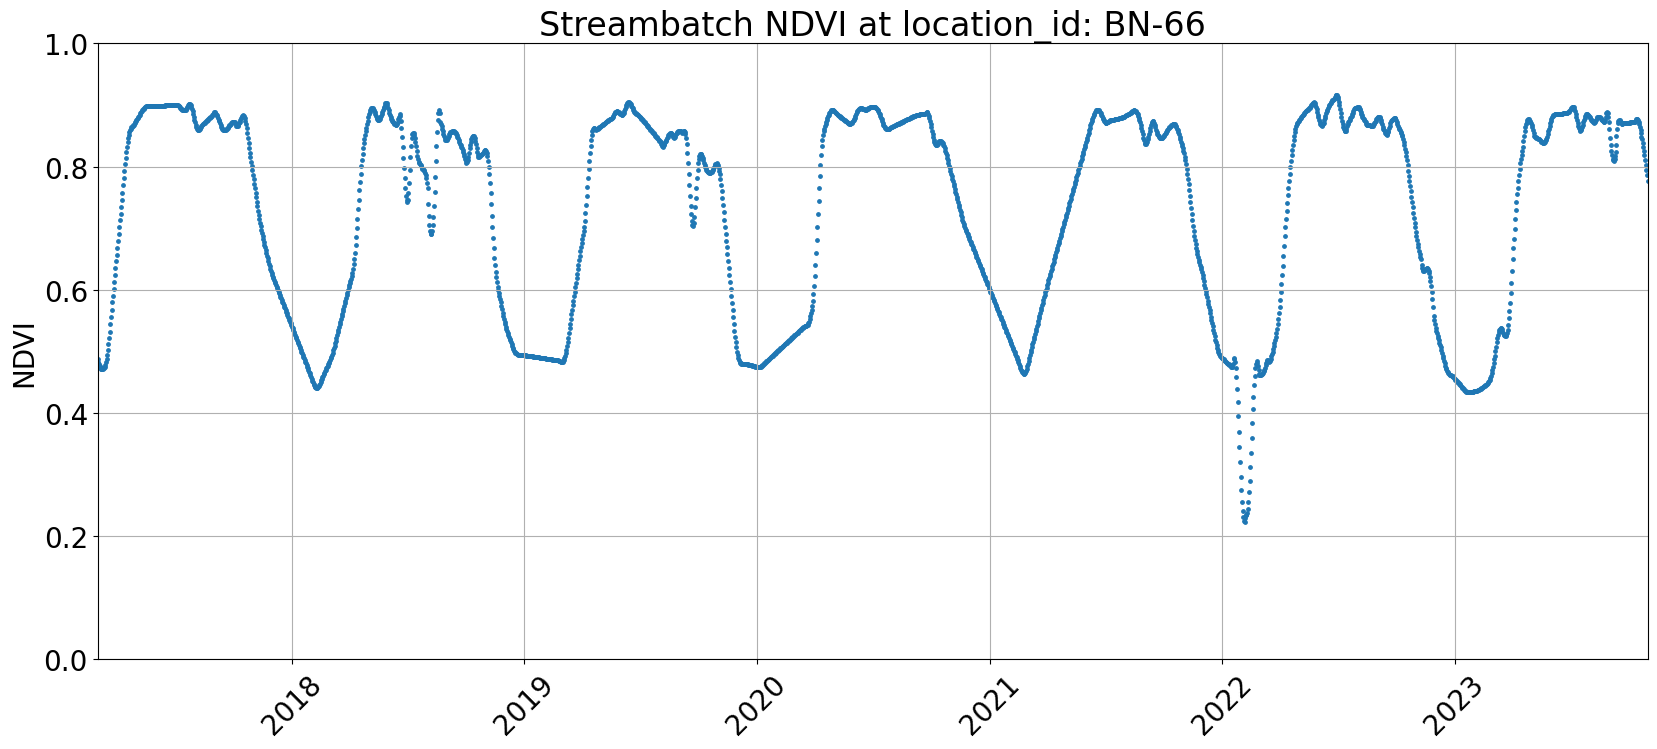

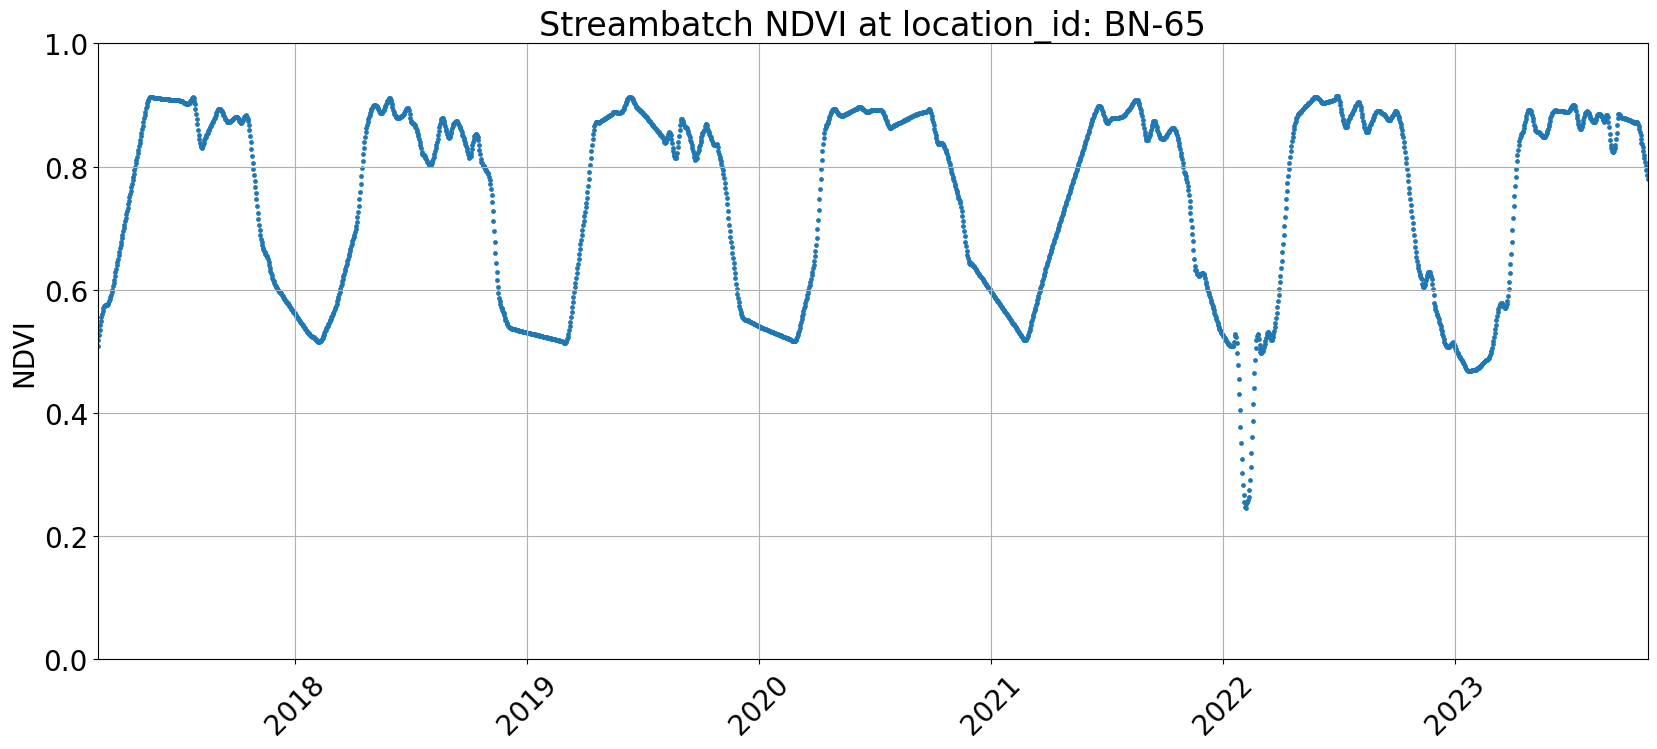

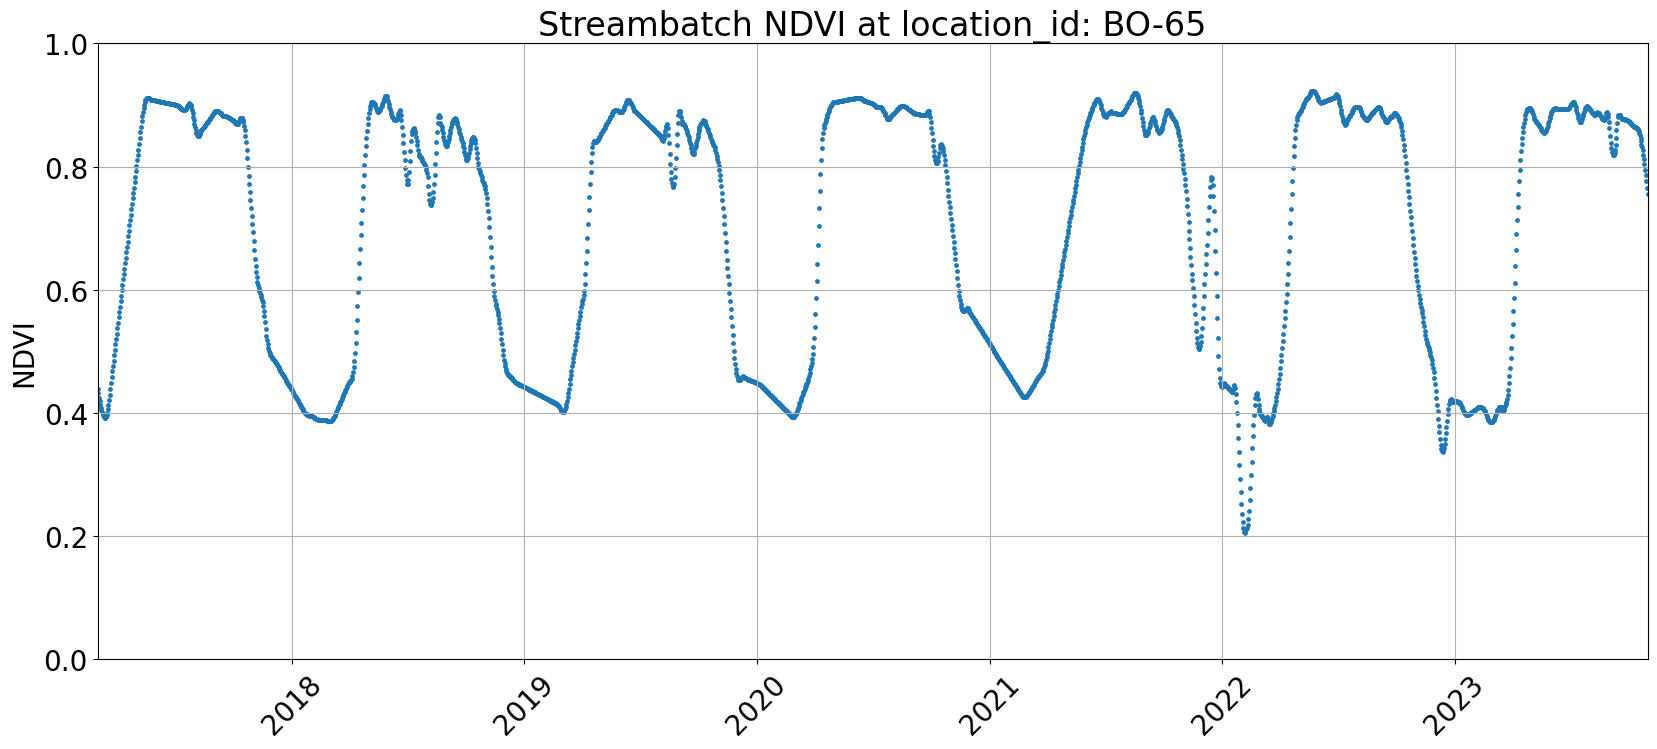

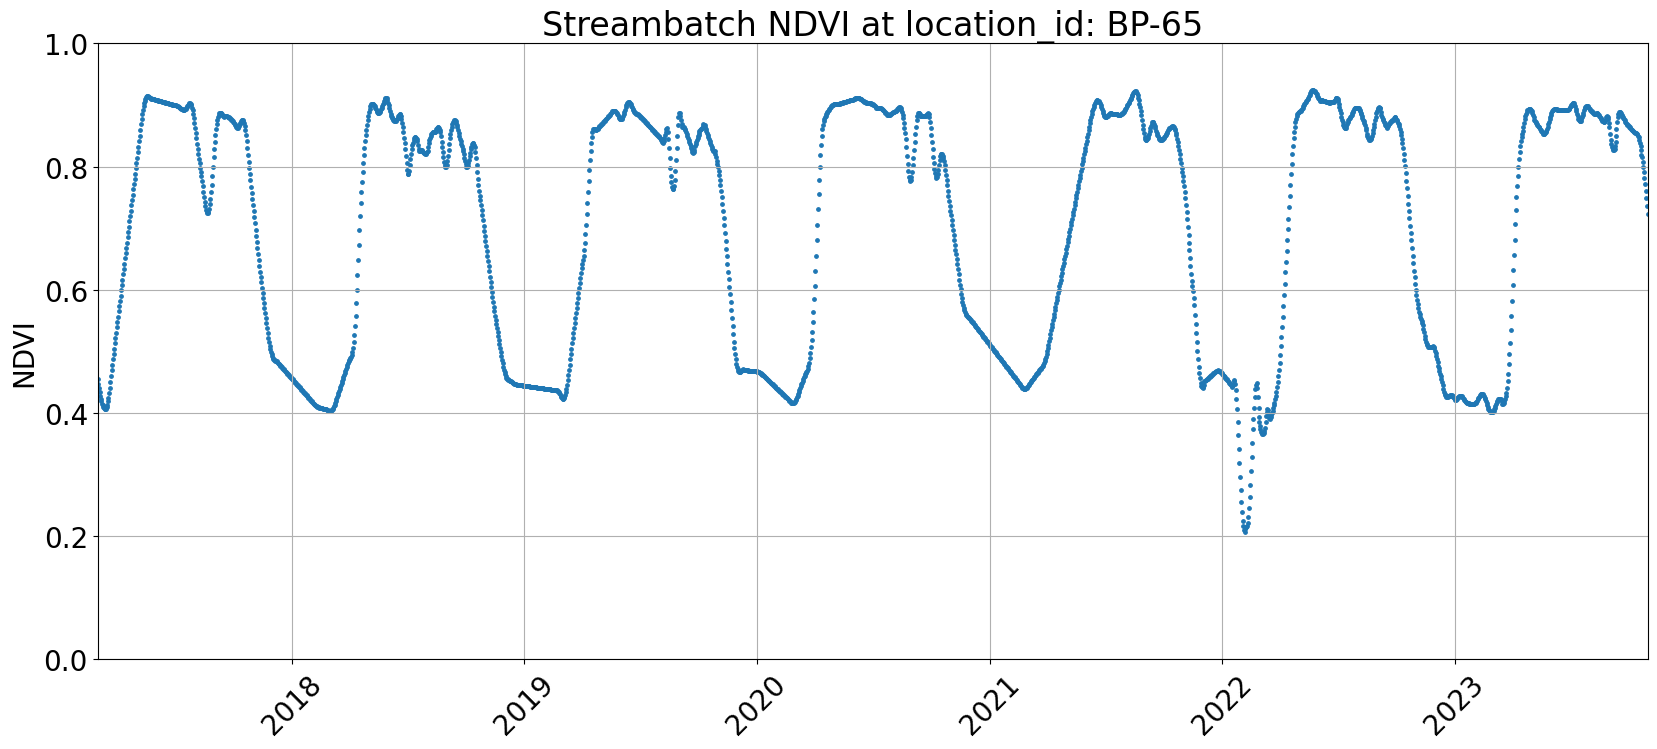

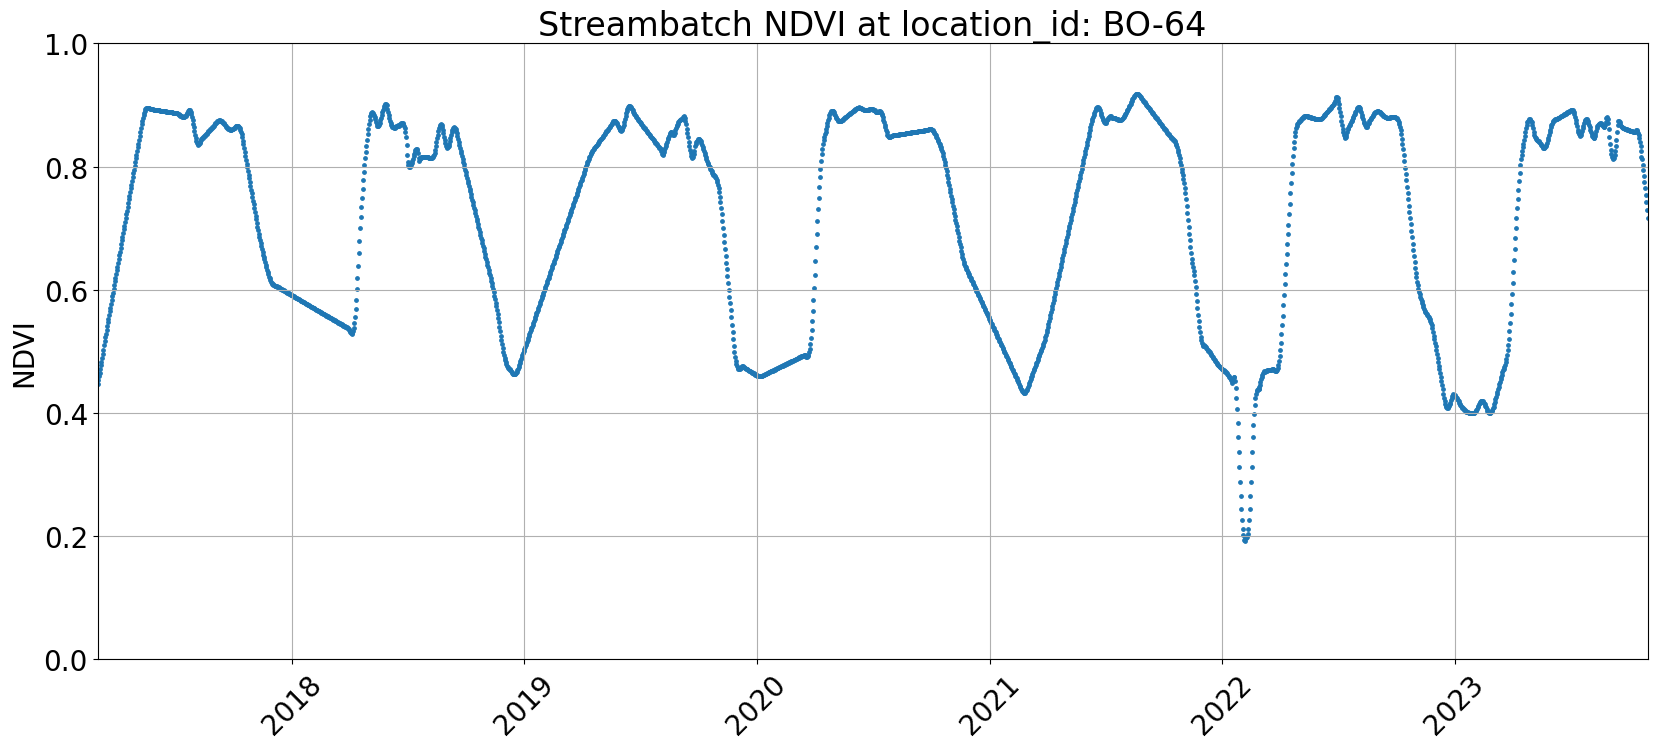

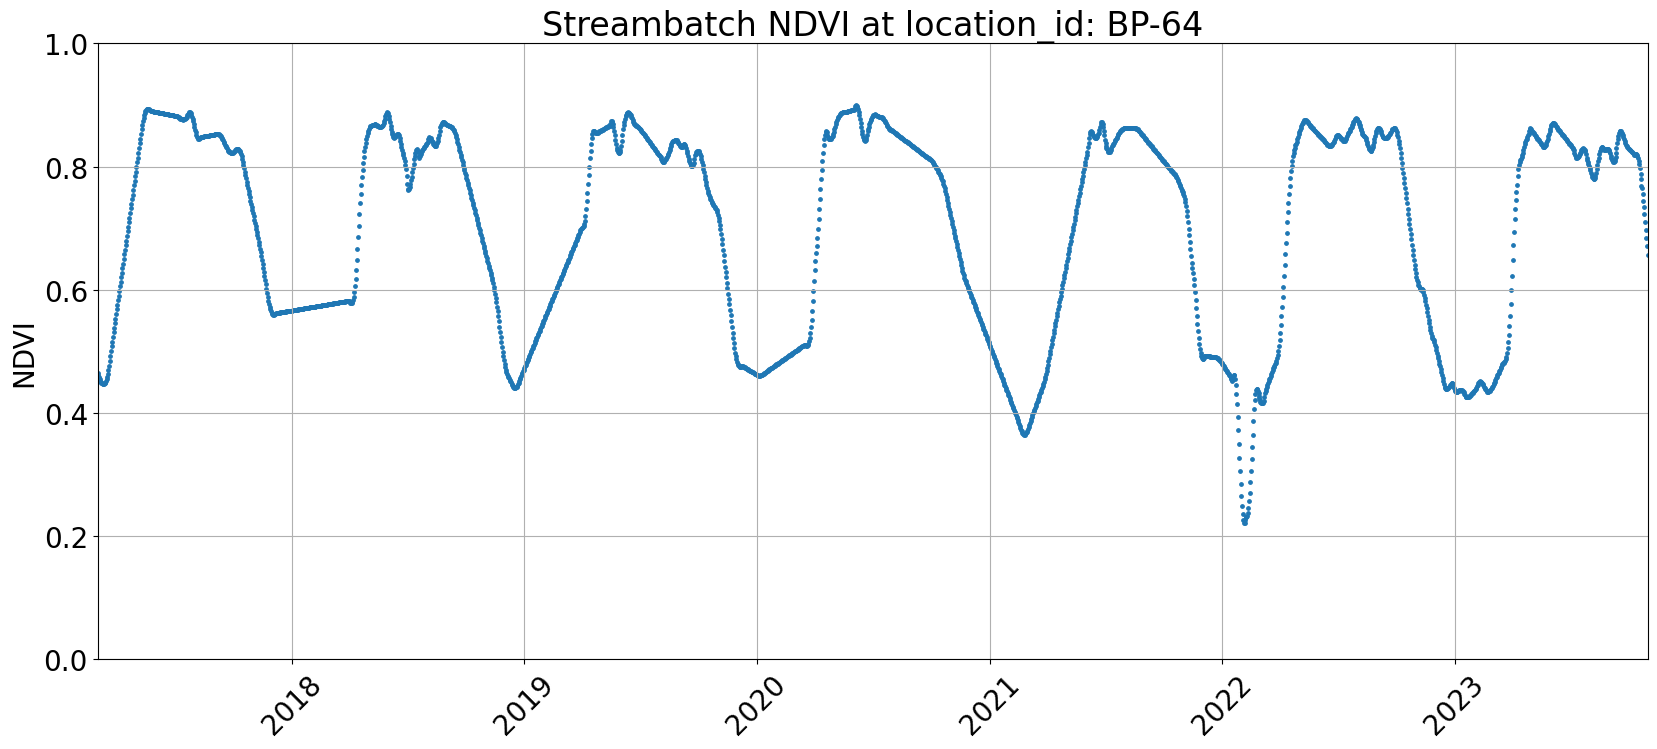

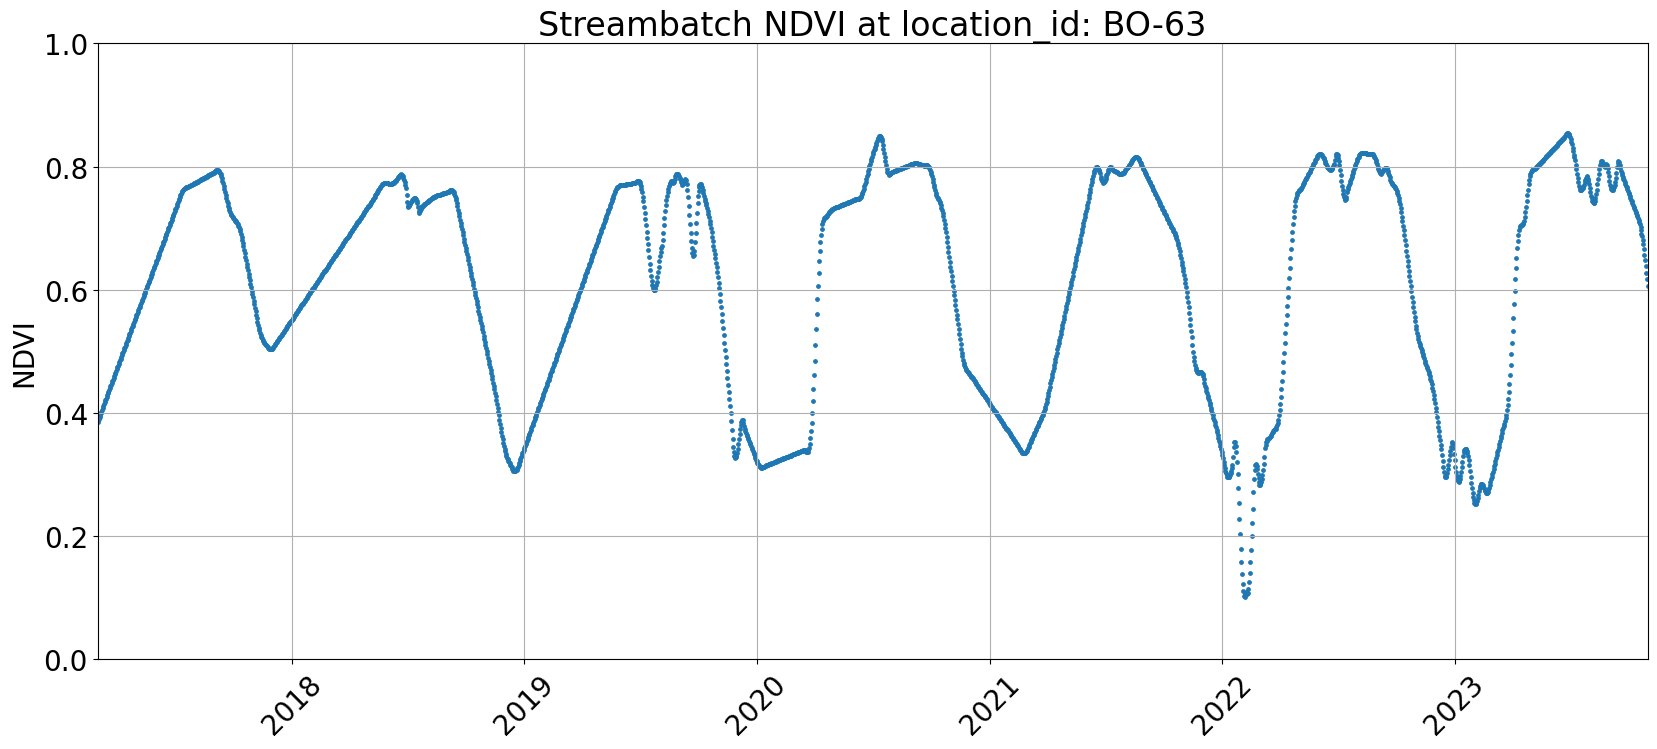

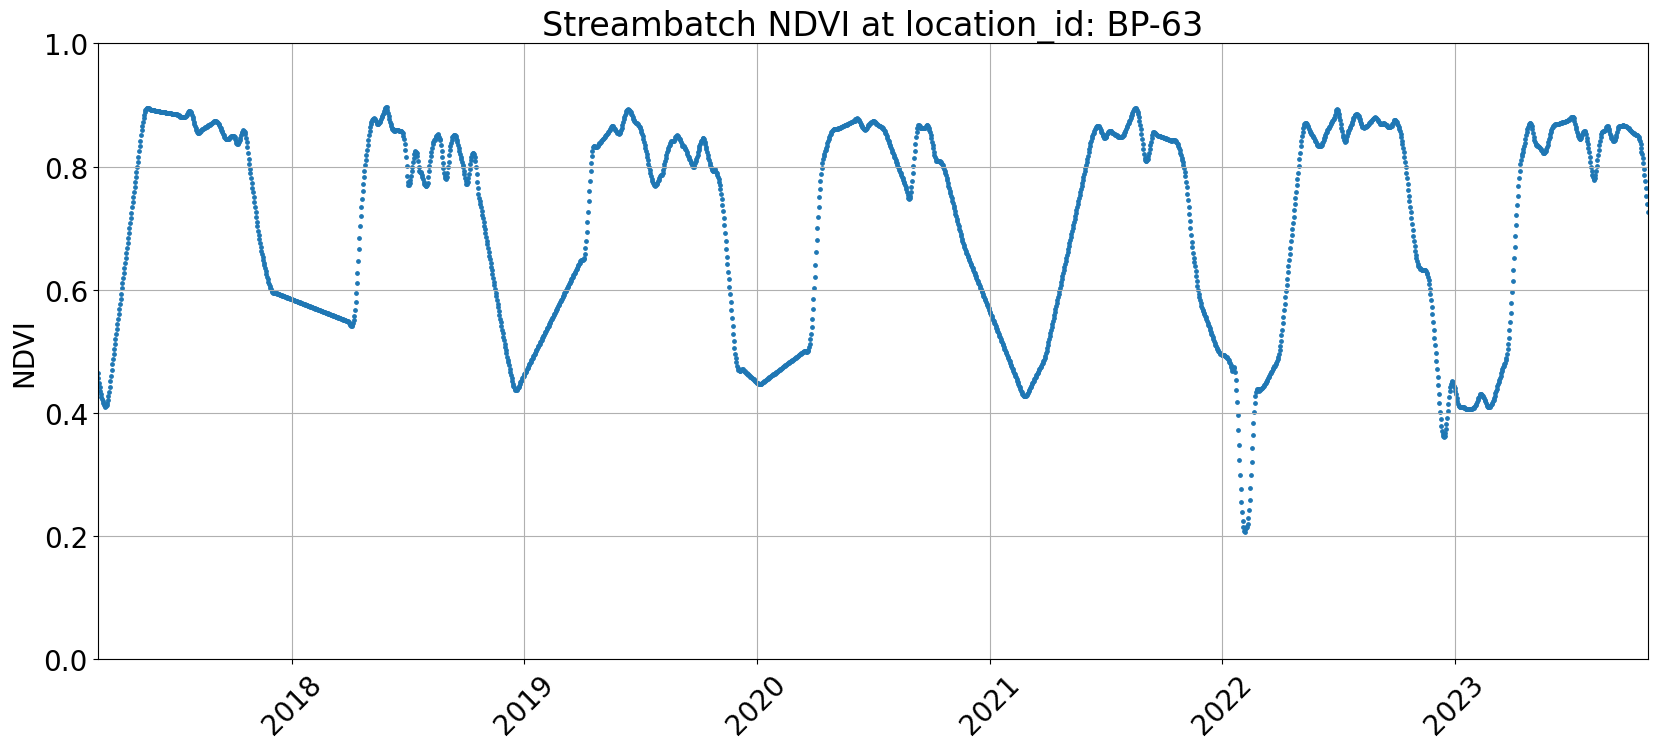

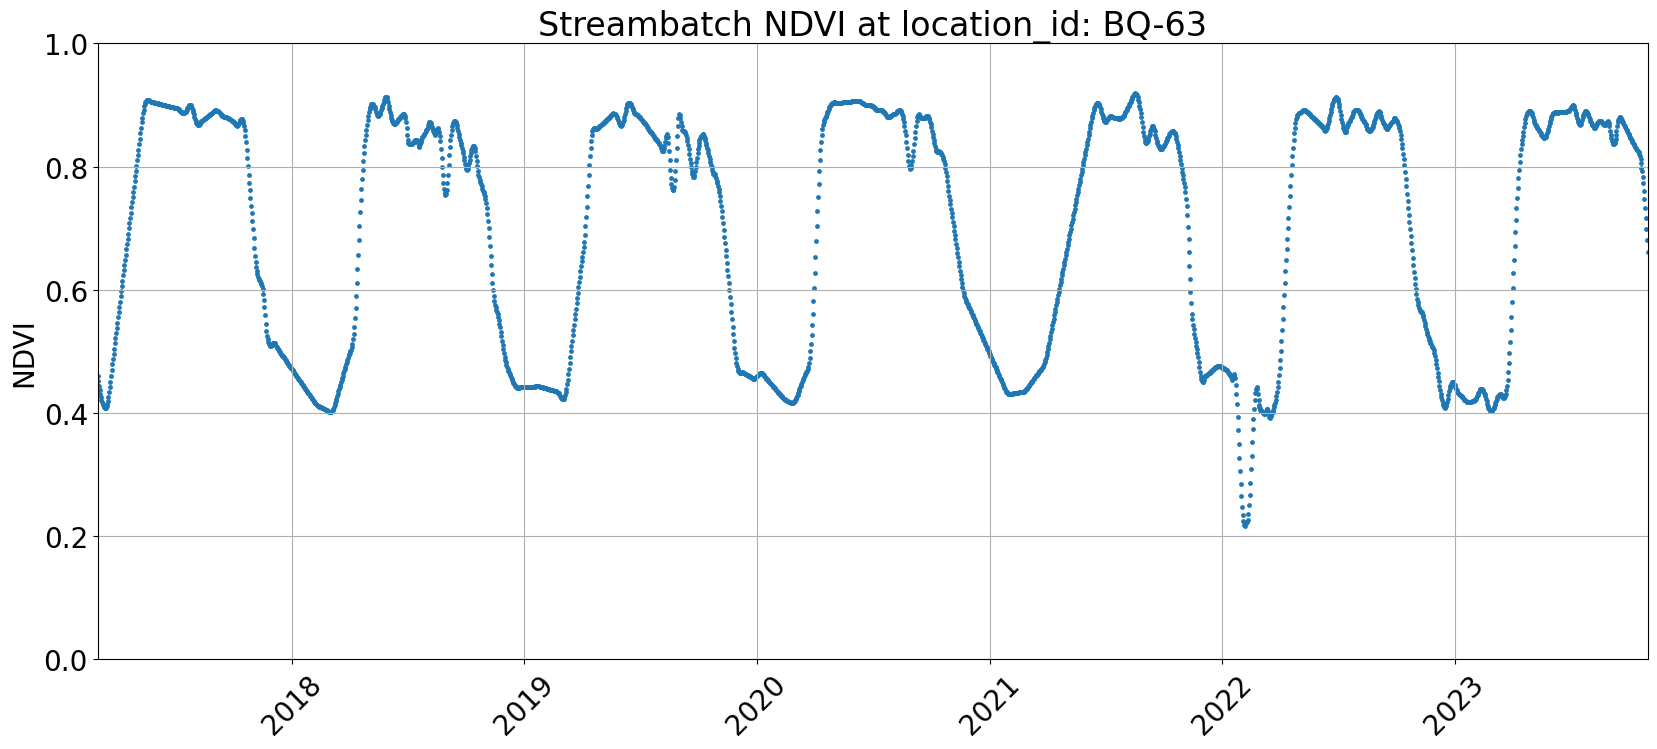

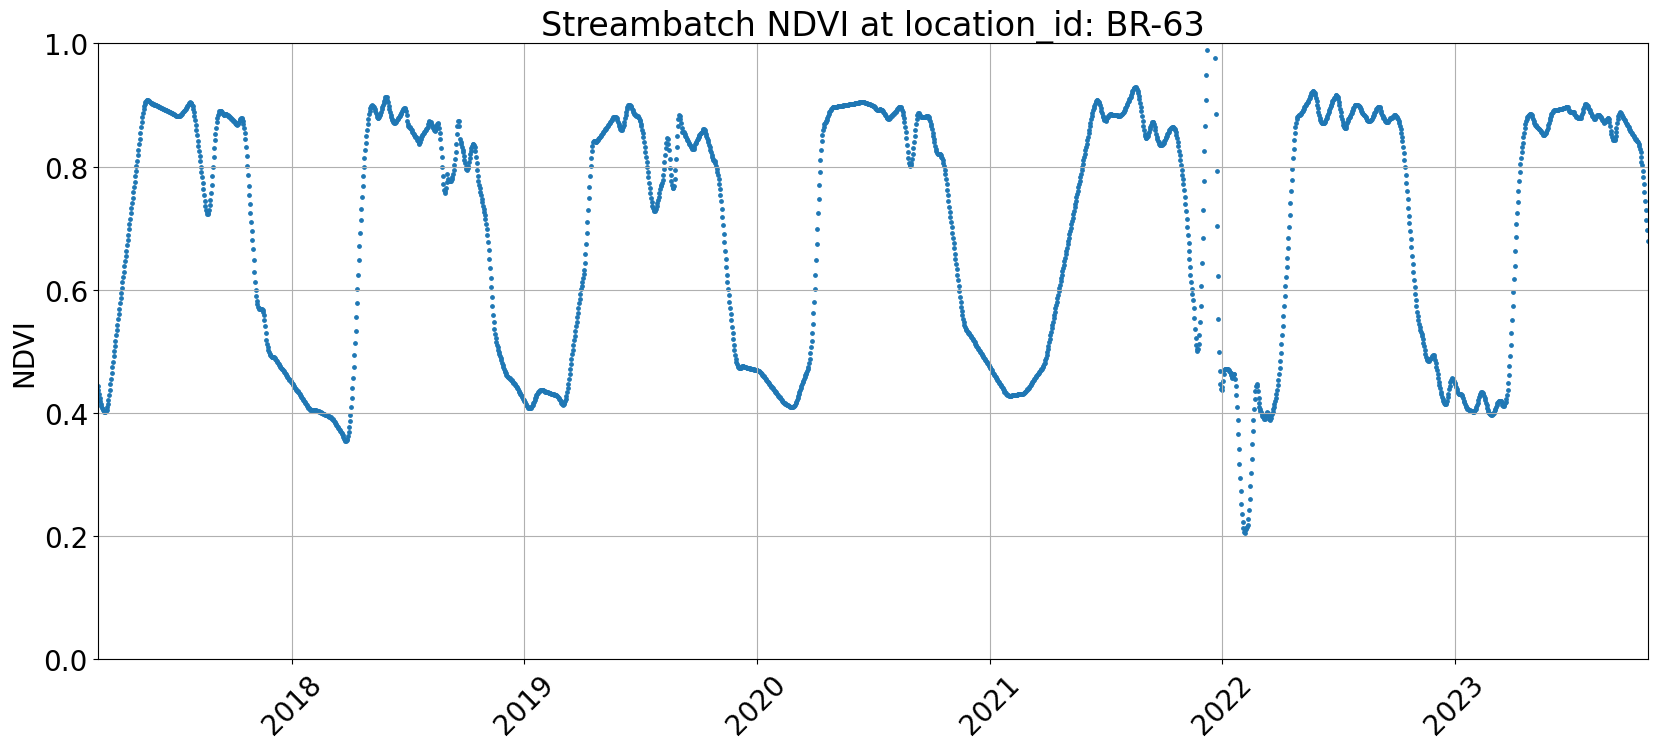

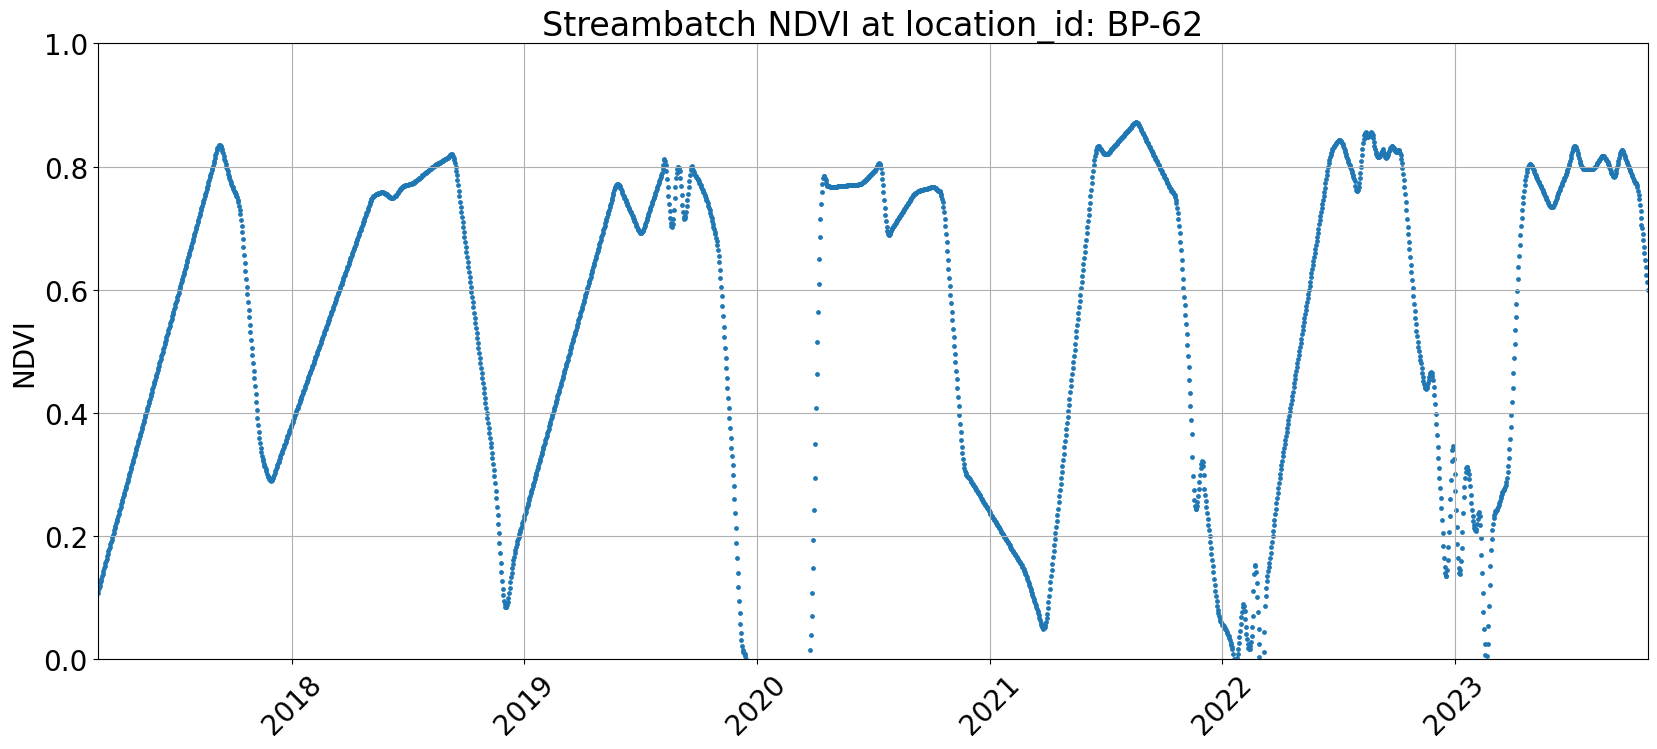

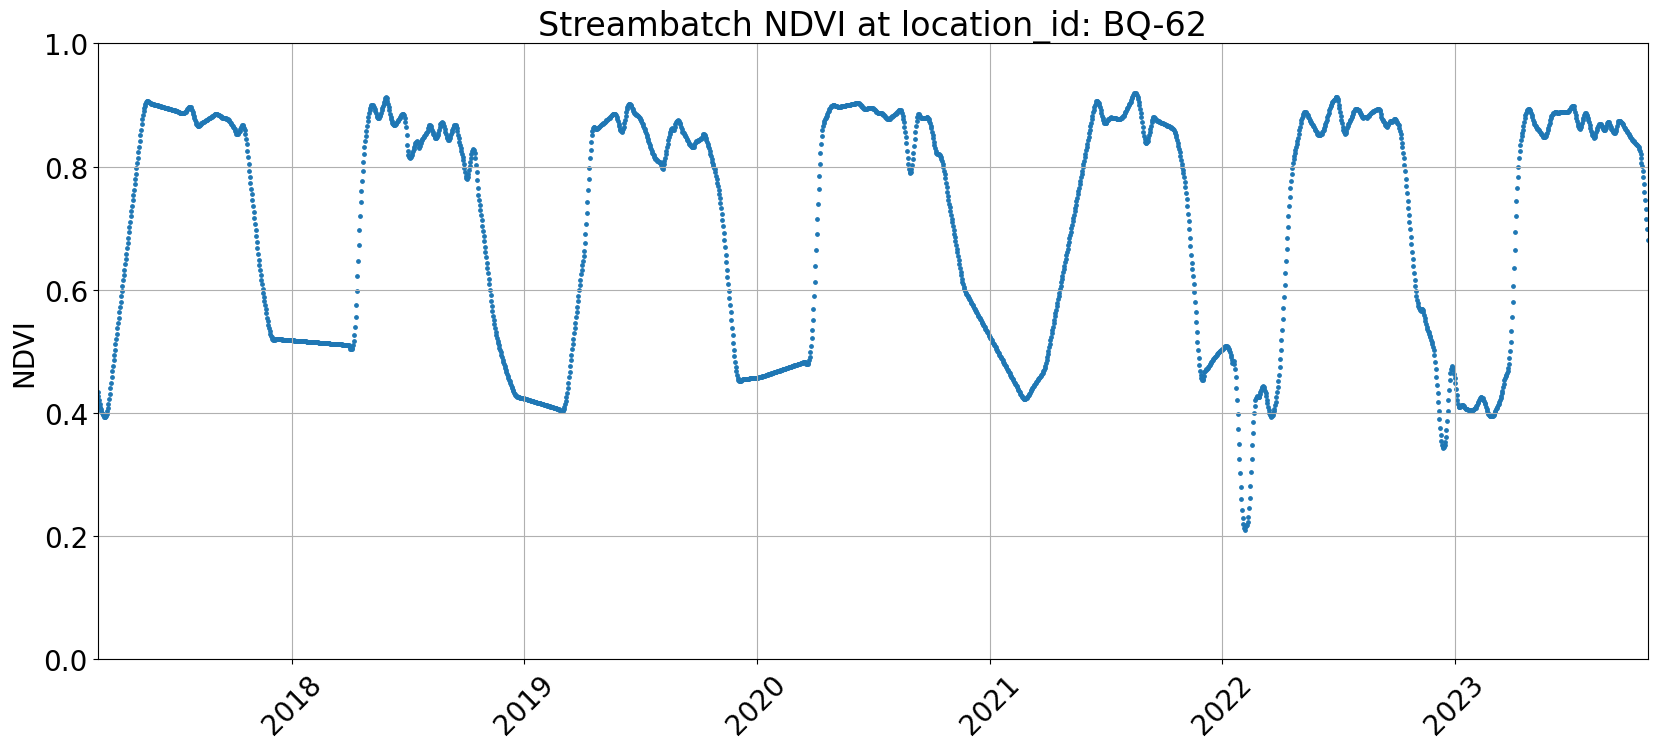

In [14]:
import matplotlib.pyplot as plt

for location_id in location_ids:
    df1 = df[df['location_id'] == location_id]
    plt.rc('font', size=20)
    plt.scatter(df1['time'],df1['ndvi.streambatch_v2'],s=6)
    plt.gcf().set_size_inches(20, 8)
    ax = plt.gca()
    ax.margins(0)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.ylim(0,1)
    plt.ylabel('NDVI')
    plt.title('Streambatch NDVI at location_id: ' + str(location_id))
    plt.show()